## Context
This dataset ([source](https://www.kaggle.com/szymonjanowski/internet-articles-data-with-users-engagement)) consists of data about news articles collected from Sept. 3, 2019 until Nov. 4, 2019. Afterwards, it is enriched by Facebook engagement data, such as number of shares, comments and reactions. It was first created to predict the popularity of an article before it was published. However, there is a lot more you can analyze; take a look at some suggestions at the end of this template.

In [46]:
# Load packages
import numpy as np 
import pandas as pd 
#for plots
import seaborn as sns
import matplotlib.pyplot as plt


## Load your data

In [47]:
# Load data from the csv file
df = pd.read_csv('news_articles.csv', index_col=0)
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head(3)

Number of rows/records: 10437
Number of columns/variables: 14


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN


In [3]:
# Start coding 

In [48]:
#Check the type of varibles
df.dtypes

source_id                           object
source_name                         object
author                              object
title                               object
description                         object
url                                 object
url_to_image                        object
published_at                        object
content                             object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
dtype: object

In [50]:
#change (published at) to datetime type
df['published_at'] = pd.to_datetime(df['published_at'])

#change (source name) to categorical type
df['source_name'] = df['source_name'].astype('category')

#change (top articals) to categorycal type
df['top_acticle'] = df['top_article'].astype('category')

In [53]:
#see if there are any duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10432    False
10433    False
10434    False
10435    False
10436    False
Length: 10437, dtype: bool

In [54]:
#see how much our data has NA 
df.isnull().sum()

source_id                             0
source_name                           0
author                             1020
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
top_acticle                           2
dtype: int64

In [8]:
#delete source_id
del df['source_id']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '460.0'),
  Text(1, 0, 'ABC News'),
  Text(2, 0, 'Al Jazeera English'),
  Text(3, 0, 'BBC News'),
  Text(4, 0, 'Business Insider'),
  Text(5, 0, 'CBS News'),
  Text(6, 0, 'CNN'),
  Text(7, 0, 'ESPN'),
  Text(8, 0, 'Newsweek'),
  Text(9, 0, 'Reuters'),
  Text(10, 0, 'The Irish Times'),
  Text(11, 0, 'The New York Times'),
  Text(12, 0, 'The Wall Street Journal')])

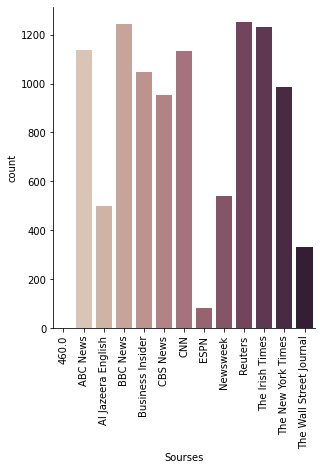

In [9]:
#plot (source_name) to see the publishers 
sns.catplot(x="source_name", kind="count", palette="ch:.25", data=df)
plt.xlabel("Sourses")
plt.xticks(rotation = 90)

In [55]:
#What is this value?
print(df[df['source_name'] == '460.0'])

    source_id source_name author  title description  url url_to_image  \
750         1       460.0  151.0  352.0         0.0  NaN          NaN   

    published_at content  top_article  engagement_reaction_count  \
750          NaT     NaN          NaN                        NaN   

     engagement_comment_count  engagement_share_count  \
750                       NaN                     NaN   

     engagement_comment_plugin_count top_acticle  
750                              NaN         NaN  


In [11]:
#it appears that it is not important and most of it is NAN so we delete it
df = df.drop(df.index[750])

In [56]:
#check if it is deleted 
df.shape

(10437, 15)

In [57]:
#overview of the column top_article
df['top_article'].describe()

count    10435.000000
mean         0.122089
std          0.327404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: top_article, dtype: float64

Text(0.5, 1.0, 'reaction to articales')

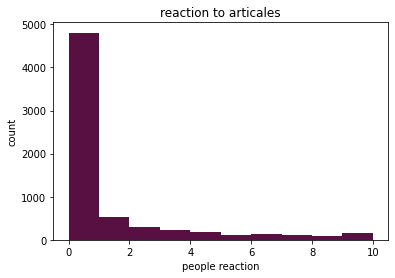

In [14]:
#plot engagement_reaction_count
plt.hist(df['engagement_reaction_count'],range=[0, 10], color='#580f41', align='mid')
plt.xlabel('people reaction')
plt.ylabel('count')
plt.title('reaction to articales')

In [15]:

#overview of the column engagenent_reaction_count
df['engagement_reaction_count'].describe()

count     10319.000000
mean        381.395290
std        4433.344792
min           0.000000
25%           0.000000
50%           1.000000
75%          43.000000
max      354132.000000
Name: engagement_reaction_count, dtype: float64

Text(0.5, 1.0, 'number of shares for the articales')

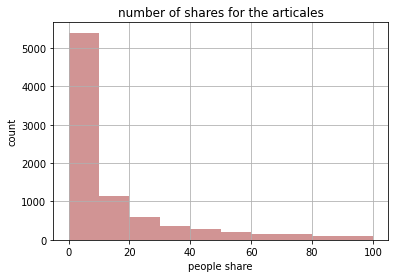

In [16]:
#plot engagement_share_count
plt.hist(df['engagement_share_count'],range=[0, 100], color='brown',alpha=0.5, align='mid')
plt.grid(b=None)
plt.xlabel('people share')
plt.ylabel('count')
plt.title('number of shares for the articales')

In [17]:
#overview of the column engagenent_share_count
df['engagement_share_count'].describe()

count    10319.000000
mean       196.236263
std       1020.680229
min          0.000000
25%          1.000000
50%          8.000000
75%         47.500000
max      39422.000000
Name: engagement_share_count, dtype: float64

Text(0.5, 1.0, 'number of comments for the articales')

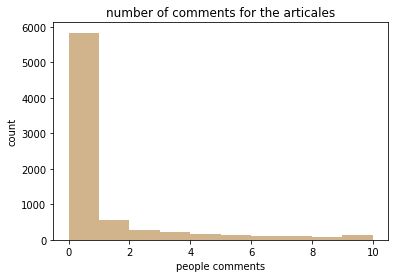

In [18]:
#plot engagement_comment_count
plt.hist(df['engagement_comment_count'],range=[0, 10], color='#D2B48C', align='mid')
plt.xlabel('people comments')
plt.ylabel('count')
plt.title('number of comments for the articales')

In [19]:
#overview of the column engagenent_comment_count
df['engagement_comment_count'].describe()

count    10319.000000
mean       124.032949
std        965.351188
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max      48490.000000
Name: engagement_comment_count, dtype: float64

Text(0.5, 1.0, 'number of comment plugin of each artical')

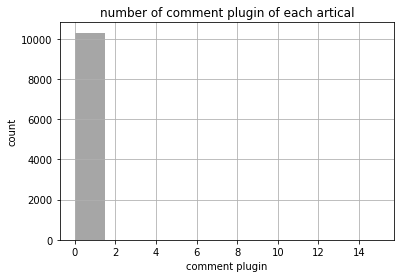

In [20]:
#plot of engagement_comment_plugin_count
plt.hist(df['engagement_comment_plugin_count'], range=[0, 15], color='gray',alpha=0.7, align='mid')
plt.grid(b=None)
plt.xlabel('comment plugin')
plt.ylabel('count')
plt.title('number of comment plugin of each artical')

In [21]:
df['engagement_comment_plugin_count'].describe()

count    10319.000000
mean         0.011629
std          0.268276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: engagement_comment_plugin_count, dtype: float64

#
For our purpose of finding the best day and time to post an article, I will join the four columns (share, comment, comment plugin, and reaction)since they are the same category and deliver the same message which is how many people engage on these articles. I will not combine the top article column because it doesn't have the same value as others since it is categorical with only 0-1 values. In addition to that, I will not delete the outliers for now maybe they are important.

In [22]:
#join the four columns in one
df['engagement'] = df['engagement_comment_plugin_count']+df['engagement_comment_count']+df['engagement_share_count']+df['engagement_reaction_count']

Text(0.5, 1.0, 'number of engagement for the articals')

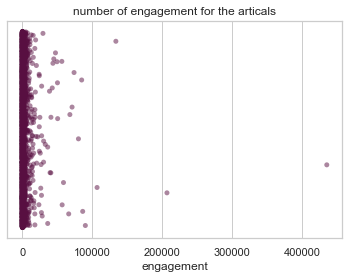

In [23]:
#plot engamement 
sns.set_theme(style='whitegrid')
sns.stripplot(df['engagement'], jitter=0.45, alpha=0.5, color="#580f41").set_title('number of engagement for the articals')

<AxesSubplot:xlabel='engagement'>

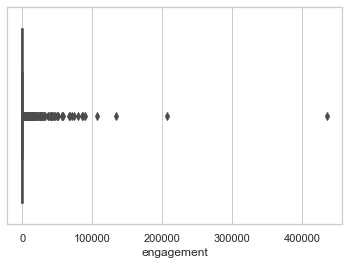

In [24]:
# lets have an overview of the otliers we have using the boxplot
sns.set_theme(style='whitegrid')
sns.boxplot(df['engagement'])

In [25]:
#remove values over 100000 in engagement column
df = df[~ (df['engagement'] > 100000)]

In [26]:
#How many null we have in this column
df['engagement'].isnull().sum()

117

In [27]:
#because there are not much, we are going to delete null
df['engagement'].dropna()

0        2528.0
1          18.0
3           7.0
4           0.0
5           0.0
          ...  
10432       0.0
10433     627.0
10434    4717.0
10435       0.0
10436       0.0
Name: engagement, Length: 10315, dtype: float64

In [28]:
#separate date and time to differant columns
df['date'] = df['published_at'].dt.date
df['time'] = df['published_at'].dt.time

#convert it to date type
df['date'] = pd.to_datetime(df['date'])

In [29]:
df['date'] 

0       2019-09-03
1       2019-09-03
2       2019-09-03
3       2019-09-03
4       2019-09-03
           ...    
10432   2019-10-03
10433   2019-10-03
10434   2019-10-03
10435   2019-10-03
10436   2019-10-03
Name: date, Length: 10432, dtype: datetime64[ns]

In [30]:
#have only the day without year and month
df['date'] = df['date'].dt.strftime('%d')

In [31]:
df['date']

0        03
1        03
2        03
3        03
4        03
         ..
10432    03
10433    03
10434    03
10435    03
10436    03
Name: date, Length: 10432, dtype: object

In [44]:
#the number of rows in each day
df.groupby('date')['engagement'].count()

date
01     743
02     763
03    1567
05     810
06     797
07     588
09     630
10     833
12     833
14     582
15     623
19     795
27     751
Name: engagement, dtype: int64

In [32]:
#sum all obsevations of engagement in the same day
day = df.groupby('date')['engagement'].sum()

In [33]:
print(day)

date
01     528146.0
02     568466.0
03    1128886.0
05     401166.0
06     292465.0
07     428388.0
09     438972.0
10     633126.0
12     468730.0
14     271049.0
15     343763.0
19     385135.0
27     470750.0
Name: engagement, dtype: float64


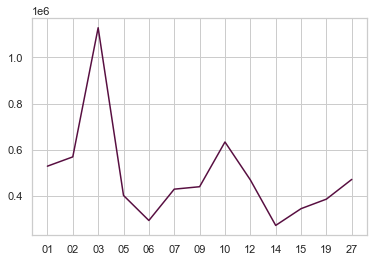

In [34]:
#plot the sum of engagement of the day
plt.plot(day, color="#580f41")

In [39]:
#Now moving to time 
df['time']

0        16
1        10
2        14
3        17
4        14
         ..
10432    16
10433    15
10434    11
10435    16
10436    16
Name: time, Length: 10432, dtype: object

In [37]:
#take only houres
df['time'] = df['published_at'].dt.strftime('%H')

In [38]:
df['time']

0        16
1        10
2        14
3        17
4        14
         ..
10432    16
10433    15
10434    11
10435    16
10436    16
Name: time, Length: 10432, dtype: object

In [40]:
# sum all engagement from the same hour
hour = df.groupby('time')['engagement'].sum()

In [61]:
print(hour.mean())

317952.1


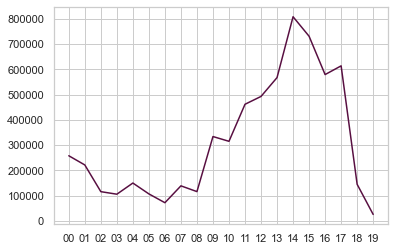

In [41]:
plt.plot(hour, color="#580f41")

To sum up; there are many factors that affect engagements such as the popularity of the author, the popularity of the publisher, and the article title and purpose. However, the day/time factor should not be neglected too. According to the data, the best date to publish is day 10. The best time to publish is between 14-17. Finally, this data is missing a lot of values regarding some days and hours so the conclusion is not critical but worth looking at. Hoping for more data in the future to be added.